In [1]:
# importing required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# loading dataset

raw_data = pd.read_csv('sonar.all-data.csv', header=None)

### Analyzing Data

### Discriptive Statistics

In [3]:
# Shape
print(raw_data.shape)

(208, 61)


In [4]:
# types - checking the data types of each attribute

print(raw_data.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object


In [5]:
# head - checking first 20 rows of the data

print(raw_data.head(10))

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6  0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7  0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8  0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9  0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0

#### We can see all of the data has the same scale and class attribute 60 has string value

In [6]:
# Summarizing the distribution of each attribute

pd.set_option('precision',3 )

print(raw_data.describe().T)

    count   mean    std        min    25%    50%    75%    max
0   208.0  0.029  0.023  1.500e-03  0.013  0.023  0.036  0.137
1   208.0  0.038  0.033  6.000e-04  0.016  0.031  0.048  0.234
2   208.0  0.044  0.038  1.500e-03  0.019  0.034  0.058  0.306
3   208.0  0.054  0.047  5.800e-03  0.024  0.044  0.065  0.426
4   208.0  0.075  0.056  6.700e-03  0.038  0.062  0.100  0.401
5   208.0  0.105  0.059  1.020e-02  0.067  0.092  0.134  0.382
6   208.0  0.122  0.062  3.300e-03  0.081  0.107  0.154  0.373
7   208.0  0.135  0.085  5.500e-03  0.080  0.112  0.170  0.459
8   208.0  0.178  0.118  7.500e-03  0.097  0.152  0.233  0.683
9   208.0  0.208  0.134  1.130e-02  0.111  0.182  0.269  0.711
10  208.0  0.236  0.133  2.890e-02  0.129  0.225  0.302  0.734
11  208.0  0.250  0.140  2.360e-02  0.133  0.249  0.331  0.706
12  208.0  0.273  0.141  1.840e-02  0.166  0.264  0.351  0.713
13  208.0  0.297  0.164  2.730e-02  0.175  0.281  0.386  0.997
14  208.0  0.320  0.205  3.100e-03  0.165  0.282  0.453

#### The data has the same range, but interestingly differing mean values. There may be some benefit from standardizing the data.

In [7]:
# class distribution - Quik look at the breakdown of class values

print(raw_data.groupby(60).size())

60
M    111
R     97
dtype: int64


##### The classes are reasonably balanced between M (mines) and R (rocks)

# Data Visualization

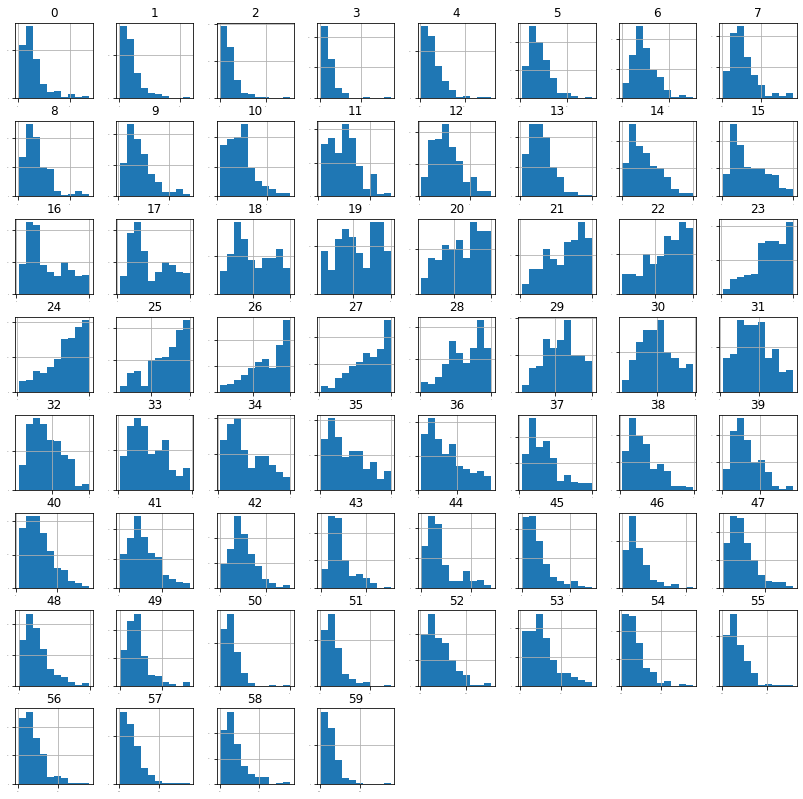

In [8]:
# histogram - to check the data distribution

raw_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(14, 14))
plt.show()

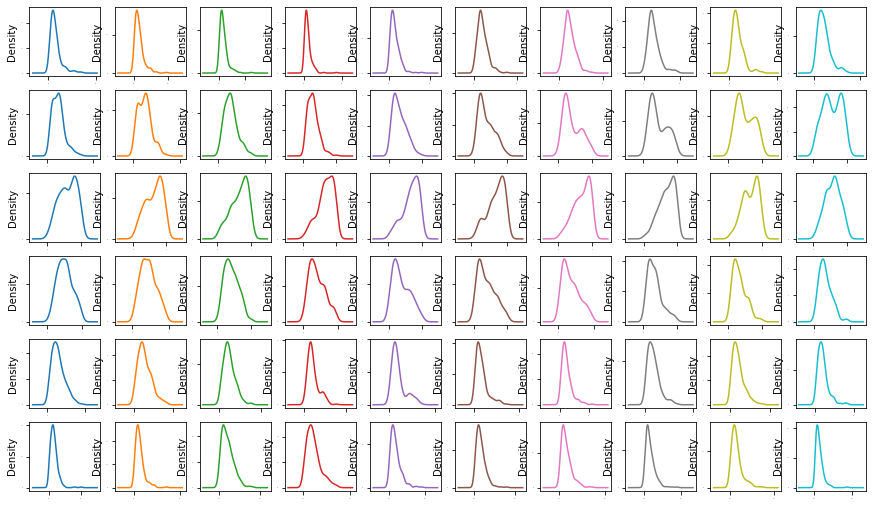

In [9]:
# Density - to check the data density

raw_data.plot(kind='density', subplots=True, layout=(10, 10), sharex=False, legend=False, fontsize=1, figsize=(15,15))
plt.show()

#### Density plot shows that many of the attributes have skewed distribution.

## Multimodal Data Visualization

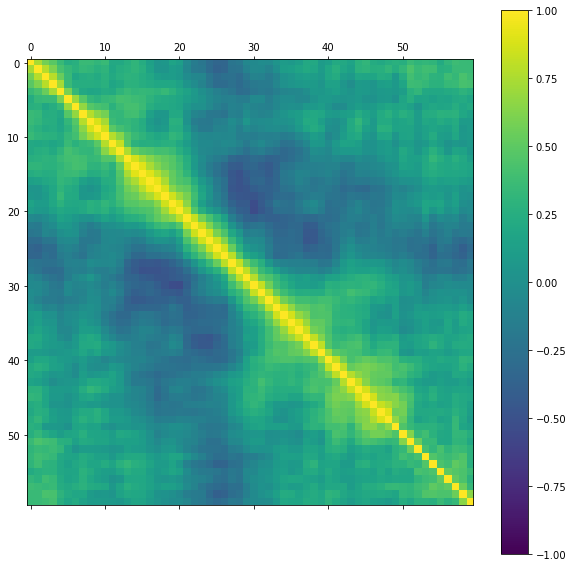

In [10]:
# Correlation matrix - checking the correlations between the attributes

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(raw_data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
plt.show()

<span>The yellow around the diagonal suggests that attributes that are next to each other are generally more correlated
with each other. The blue patches also suggest some moderate negative correlation the further
attributes are away from each other in the ordering. This makes sense if the order of the
attributes refers to the angle of sensors for the sonar chirp.</span>

In [11]:
# Spliting the data

array = raw_data.values
X = array[:, 0:60].astype(float)
y = array[:, 60]

In [12]:
# Splitting the dataset into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Evaluate Algorithms - Baseline

we don't know which algorithm will do well on this dataset between Logistic regression and LDA.
Let's design our test harness. We wil use 10-fold cross validation.
We will evaluate the algorithms using the accuracy metric

In [13]:
# Test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'accuracy'

In [14]:
# Spot-check algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [15]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.777574 (0.088423)
LDA: 0.778676 (0.093570)


Above are the mean accuracy values. It is wise to look at the distribution of accuracy
values calcuated across cross validation folds. 

<p>We can use Box and Whisker plots for that.</p>

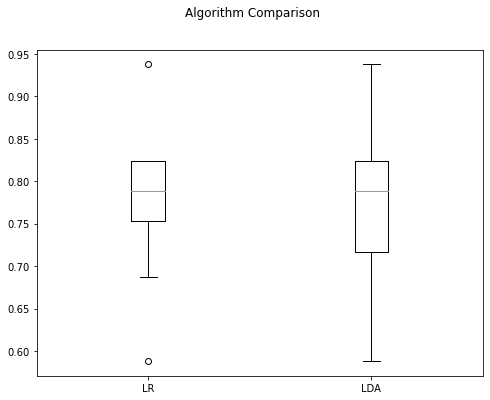

In [16]:
# Compare Attributes

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

# Evaluate Algorithms: Standardize Data

In [17]:
# Standardize the dataset

pipelines = []
pipelines.append(('Scaled LogisticRegression', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('Scaled LDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))

results = []
names = []

for name, model in pipelines:
    kflod = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled LR: 0.754412 (0.067926)
Scaled LDA: 0.778676 (0.093570)


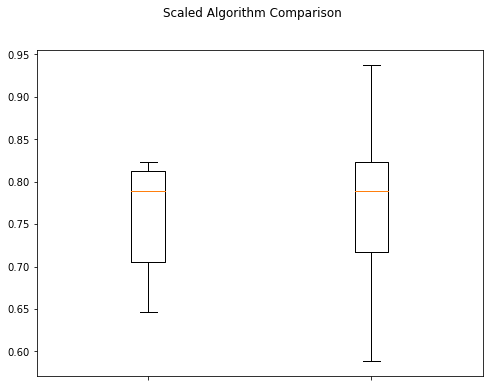

In [18]:
# Compare Attributes

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

# Tuning Logistic Regression

In [61]:
# creating model

clf = LogisticRegression()

dual=[True,False]
# Creating Hyperparameter search space

penalty_list = ['l1', 'l2', 'elasticnet']

# regularization hyperparameter space
c_values = np.logspace(0,10,10)

# regularization hyperparameter solver
solver_list = ['lbfgs','newton-cg','liblinear', 'sag', 'saga']

max_iter=[100,110,120,130,140, 1000,2500]

# final Hyperparameter Options
hyperparameters = dict(penalty=penalty_list, dual=dual, C = c_values, solver = solver_list, max_iter=max_iter)

In [62]:
# Creating GridSearch using 10-fold cross validation

search_grid = GridSearchCV(clf, hyperparameters, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)

In [63]:
# Fit the grid search
start_time = time.time()
best_model = search_grid.fit(X_train, Y_train)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 10 folds for each of 2100 candidates, totalling 21000 fits


C:\ProgramData\Anaconda3\envs\tf-gpu-25\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


Execution time: 75.17233657836914 ms


In [64]:
print("Tuned Hyperparameters : (best parameters) ", best_model.best_params_)

Tuned Hyperparameters : (best parameters)  {'C': 2154.4346900318847, 'dual': False, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [65]:
print("Accuracy : ", best_model.best_score_)

Accuracy :  0.8051470588235293
